In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [5]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [7]:
df.shape

(15509, 10)

In [8]:
df.describe(include="all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df = df.dropna(subset=['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])

In [11]:
# Convert data types
df['Year'] = df['Year'].str.extract('(\d{4})').astype(int)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

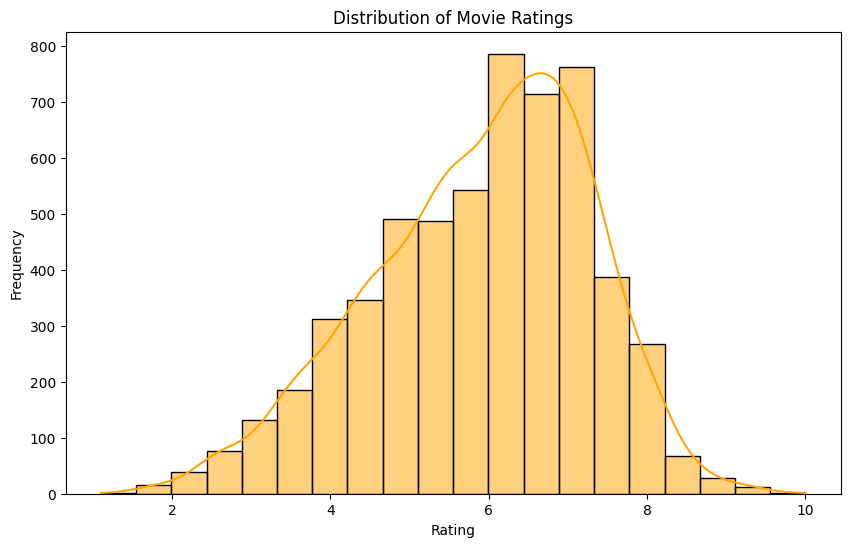

In [12]:
# Visualization of Movie Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

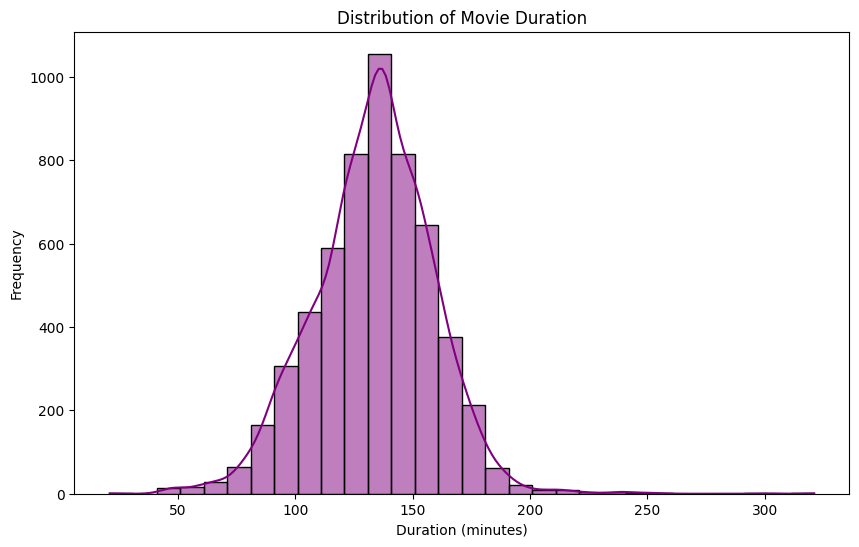

In [13]:
# Visualization of Movie Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'], bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-1af688bd4c02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


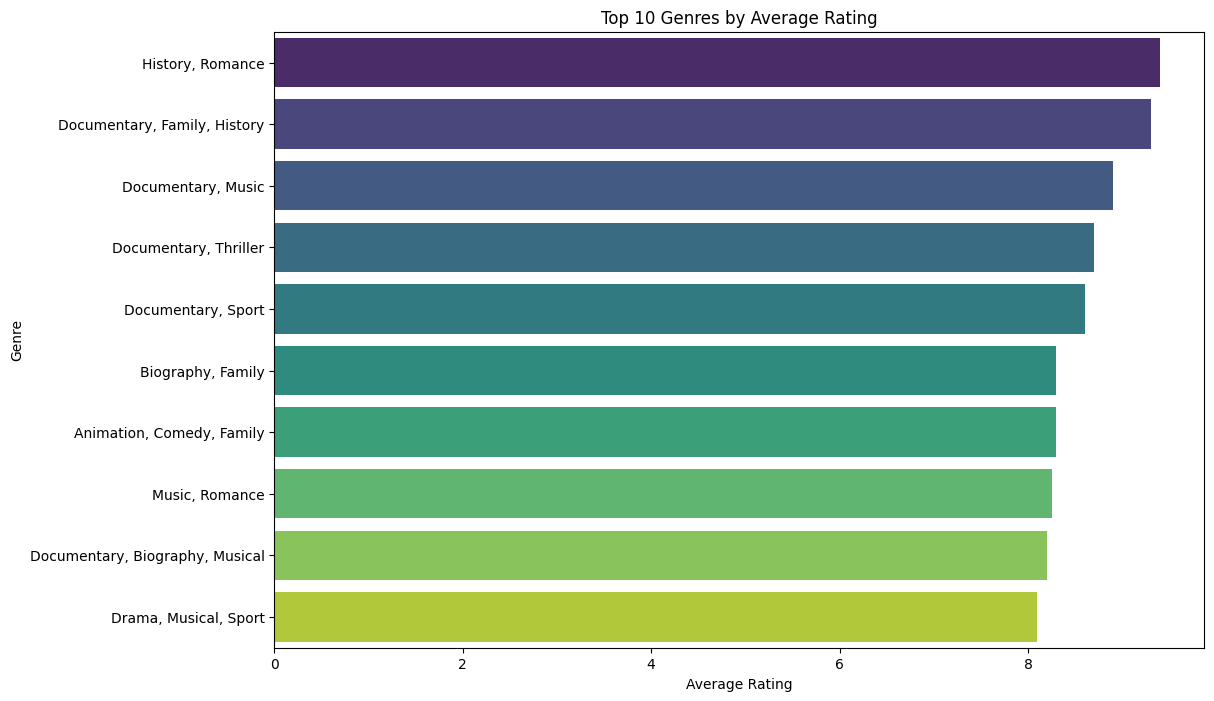

In [14]:
# Get top 10 genres by average rating
top_genres = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

<ipython-input-15-0f49ce6fc941>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='twilight')


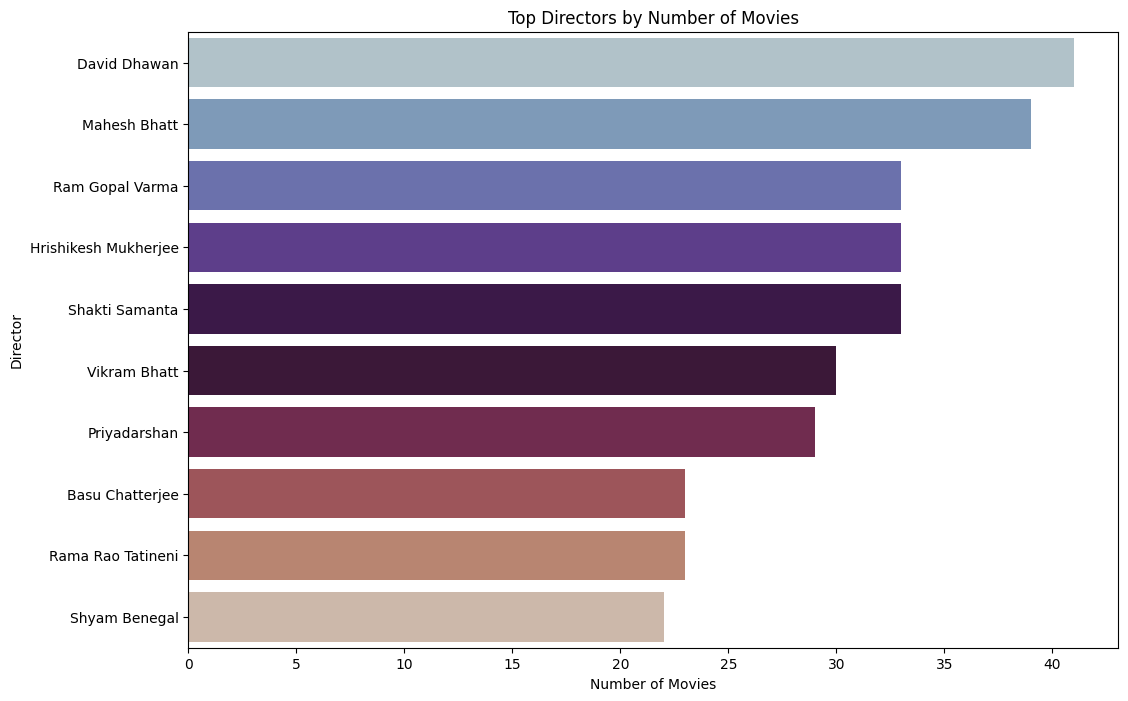

In [15]:
# Visualization of Top Directors by Number of Movies
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='twilight')
plt.title('Top Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [16]:
# Limit the number of unique values for the categorical features
def limit_categories(column, max_categories):
    counts = column.value_counts()
    keep_categories = counts.index[:max_categories]
    return column.where(column.isin(keep_categories), 'Other')

max_categories = 5
df['Genre'] = limit_categories(df['Genre'], max_categories)
df['Actor 1'] = limit_categories(df['Actor 1'], max_categories)
df['Actor 2'] = limit_categories(df['Actor 2'], max_categories)
df['Actor 3'] = limit_categories(df['Actor 3'], max_categories)
df['Director'] = limit_categories(df['Director'], max_categories)

In [17]:
# One-Hot Encoding of Categorical Features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
encoder = OneHotEncoder(sparse=False, drop='first')

encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
# Combine with the main DataFrame
df = df.drop(columns=categorical_features)
df = pd.concat([df, encoded_df], axis=1)

In [19]:
# Label Encoding for 'Name'
label_encoder = LabelEncoder()
df['Name_encoded'] = label_encoder.fit_transform(df['Name'])
df = df.drop(columns=['Name'])

In [20]:
df.columns

Index(['Year', 'Duration', 'Rating', 'Votes', 'Genre_Action, Drama',
       'Genre_Comedy, Drama', 'Genre_Drama', 'Genre_Drama, Romance',
       'Genre_Other', 'Director_Hrishikesh Mukherjee', 'Director_Mahesh Bhatt',
       'Director_Other', 'Director_Ram Gopal Varma', 'Director_Shakti Samanta',
       'Actor 1_Ashok Kumar', 'Actor 1_Dharmendra', 'Actor 1_Jeetendra',
       'Actor 1_Mithun Chakraborty', 'Actor 1_Other', 'Actor 2_Dharmendra',
       'Actor 2_Hema Malini', 'Actor 2_Mithun Chakraborty', 'Actor 2_Other',
       'Actor 2_Rekha', 'Actor 3_Mithun Chakraborty', 'Actor 3_Other',
       'Actor 3_Paresh Rawal', 'Actor 3_Pran', 'Actor 3_Prem Chopra',
       'Name_encoded'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9200 entries, 1 to 5656
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           5659 non-null   float64
 1   Duration                       5659 non-null   float64
 2   Rating                         5659 non-null   float64
 3   Votes                          5659 non-null   float64
 4   Genre_Action, Drama            5659 non-null   float64
 5   Genre_Comedy, Drama            5659 non-null   float64
 6   Genre_Drama                    5659 non-null   float64
 7   Genre_Drama, Romance           5659 non-null   float64
 8   Genre_Other                    5659 non-null   float64
 9   Director_Hrishikesh Mukherjee  5659 non-null   float64
 10  Director_Mahesh Bhatt          5659 non-null   float64
 11  Director_Other                 5659 non-null   float64
 12  Director_Ram Gopal Varma       5659 non-null   float6

In [22]:
# Handling missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [23]:
# Ensure there are no remaining NaNs
print(df.isna().sum().sum())

0


In [24]:
# Define the features (X) and the target (y)
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Model Building
# Define the features (X) and the target (y)
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Model Evaluation
# Calculate R-squared
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression R-squared: {r2_lr}")

# Calculate RMSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression Root Mean Squared Error (RMSE): {rmse_lr}")

Linear Regression R-squared: 0.07375259569736081
Linear Regression Root Mean Squared Error (RMSE): 1.0542557003970354


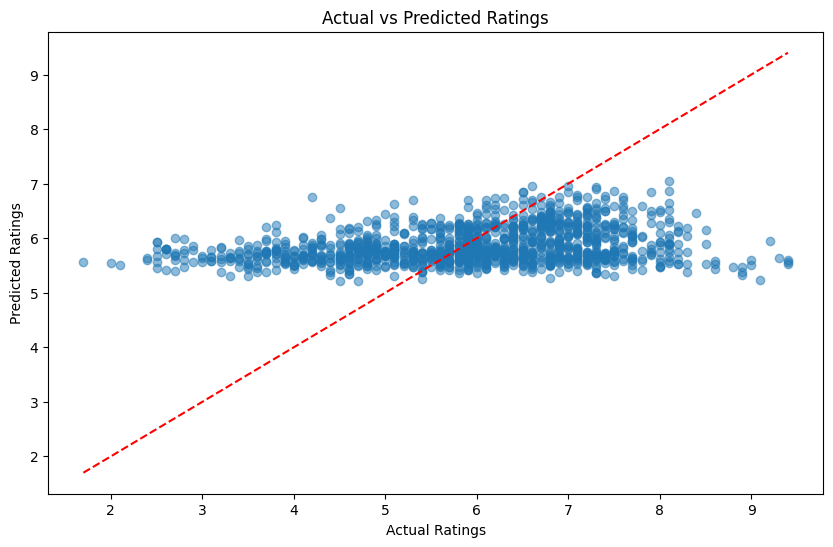

In [27]:
# Visualization of Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

We observe that the linear regression model is not a quite good fit with R-squared value of 0.074 which is not high. This clearly says that linear regression model is the go-to model in this case. We, therefore, will try out another regression model named Random Forest Model.

In [28]:
# Model Building
# Define the features (X) and the target (y)
X = df.drop(columns=['Rating'])
y = df['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define a narrower grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Use a smaller subset of the data for quicker testing
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Perform the grid search on the smaller subset
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_small, y_train_small)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest Root Mean Squared Error (RMSE): 0.9596012987047056
Random Forest R-squared: 0.2326089280628284


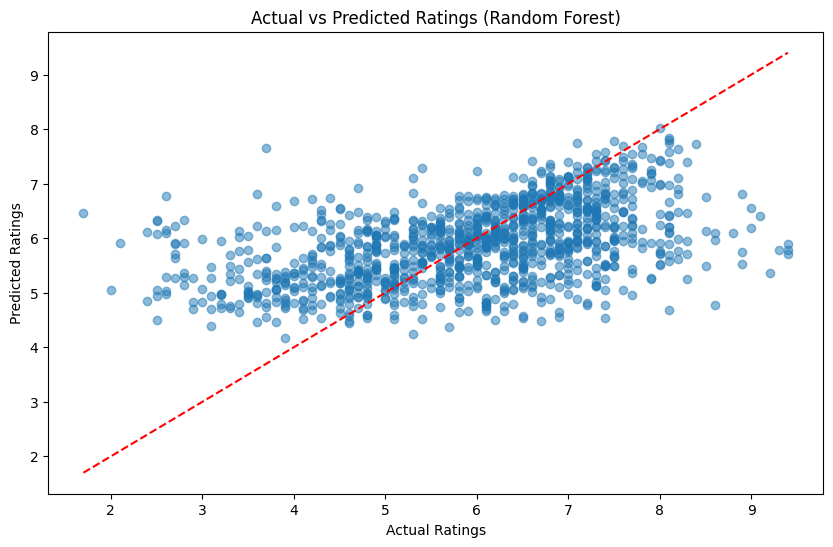

In [29]:
# Visualization of Actual vs Predicted Ratings for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Ratings (Random Forest)')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

Here also, we note that the R-squared value is only 0.233 but this Random Forest Model is an improvement over Linear Regression Model.